## Bisection Method
The bisection method is a common method to solve a root of nonlinear equation. The idea is by using a range of root which is in $[a,b]$, we split it into two parts that we expect a root from one of a part, we call it midpoint, $c$. This can be calculated by using the following equation.

$c = \frac{1} {2} (a+b)$

where $a$ and $b$ are the lower and upper boundaries respectively. The main condition is the $f(a)$ and $f(b)$ must have opposite sign. This condition must be met $f(a) . f(b) < 0$ to find a root. Therefore, there are some criteria to obtain a root by using the bisection method:

1. if $f(a) . f(b) < 0$
  1.1 If $f(c) \ne 0$, then $f(c)$ has a positive or negative root.
  1.2 Because $f(c) \ne 0$, the root is in one of these conditions:
      
      1.2.1 $f(c) f(a) < 0$ or
      
      1.2.2 $f(c) f(a) > 0$

      If the condition of 1.2.1 is met, then the root is in this boundary ($[a, c]$). Otherwise, the root is in the boundary of $[c, b]$

### Stopping Criteria

We set a tolerance value as $tol$ variable. Then, we estimate the number of iterations $N$ using the following equation

$N = [log_2 (\frac {b-a} {tol})]$

Then, we can calculate the relative error for each iteration by using

$e = |\frac {c - x_{old}} {c}|$

where $x_{old}$ is the updated root either in boundary $[a, c]$ or $[c, b]$.

### Algorithm of Bisection Method

1. If the $f(a) f(b) < 0$

    1.1. Input an expected interval, $[a,b]$, and $tol$ as tolerance value (e.g. $0.001$)

    1.2. Calculate an estimation of maximum iteration, $N = [log_2 \frac {b-a} {tol}]$
    
    1.3. Calculate the midpoint of this boundary using the equation of $c = \frac{1} {2} (a+b)$
    
    1.4. If $f(c) f(a) < 0$, $x_{old} = b$ and update the last boundary of $b = c$.
    
    Otherwise, if $f(c) f(a) > 0$, $x_{old} = a$ and update the initial boundary of $a = c$.
    Otherwise, $f(c) = 0$, $x_{old} = c$ and the root is $c$. Stop the iteration.

    1.5. Calculate the relative error
        
    1.6. Then, calculate again the new midpoint as point 1.3 above for the next iteration
2. Otherwise, give the information that the root is not identified.

### Case 1
There is a function of $f(x) = x^2 - 4 = 0$. As we know, by analytical method, this function has a root of $-2$ or $2$ (two different signs). Now, we want to find its root using the bisection method. Let us try with the initial boundary guess for $a=1$ and $b=5$.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def function(x):
    return x**2 - 4

In [3]:
def Bisection(function,a,b,tol=0.0001):
    '''
    Input:

    f: A function

    a: lower boundary

    b: upper boundary

    tol: tolarance of stoping criteria. The default is 0.0001

    Output:

    a root
    '''
    # Check the existing root
    if function(a) * function(b) < 0:
        # Calculate maximum number of iteration
        N = round(np.log2((b-a)/tol))

        errors = []
        for i in range(N):

          c = (a+b)/2

          if (function(a) * function(c)) < 0:
            xold = b
            b = c
          elif (function(a) * function(c)) > 0:
            xold = a
            a = c
          else:
            xold = c
            print('The root is: %f' % c)
            break

          e = abs((c-xold)/c)
          errors.append(e)
    else:
        print ('There is no root in this range. Please input a pair of intial boundary guess.')
        c = np.nan
        errors = 0

    return c, errors

In [4]:
a = 1
b = 4
r,er = Bisection(function,a,b)
print('The root (r) is: %f' % r)
print('f(r): %f' % function(r))
print('last iteration error: %f' % er[-1])

The root (r) is: 2.000031
f(r): 0.000122
last iteration error: 0.000046


Text(0, 0.5, 'Relative Error')

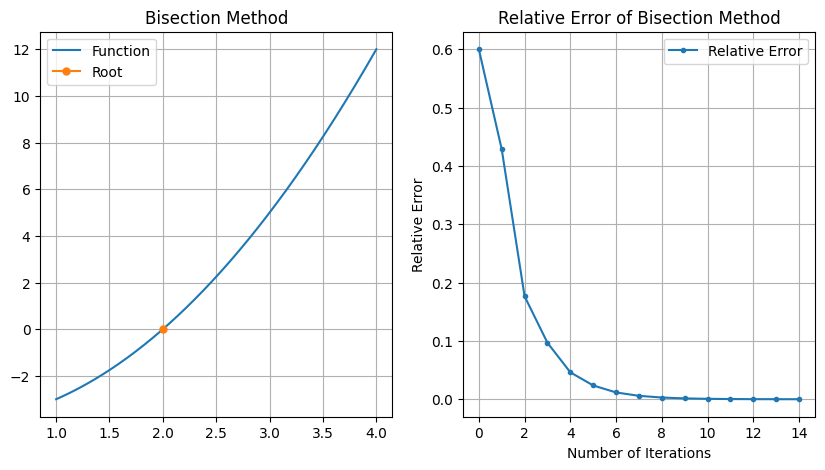

In [6]:
x = np.linspace(a,b,1000)
fx = function(x)
fig, ax = plt.subplots(figsize=(10,5), ncols=2)
ax[0].plot(x,fx, label='Function')
ax[0].plot(r,function(r), marker='.', markersize=10, label='Root')
ax[0].set_axisbelow(True)
ax[0].grid()
ax[0].legend()
ax[0].set_title('Bisection Method')

ax[1].plot(er, marker='.', label='Relative Error')
ax[1].set_axisbelow(True)
ax[1].grid()
ax[1].legend()
ax[1].set_title('Relative Error of Bisection Method')
ax[1].set_xlabel('Number of Iterations')
ax[1].set_ylabel('Relative Error')

Finally, the root has been found in the positive direction after 14 iterations where the error is 0.000046. By which precission of six decimal, the root is $2.000031$ because $f(r=2.000031) = 0.000122$, the function given the that value is close to zero for this function.

Furthermor, this function has a root in the negative direction as well, let us try to replace the boundary to $[-4, 1]$, which is to negative direction.

In [7]:
a = -4
b = 1
r, er = Bisection(function,a,b)
print('The root (r) is: %f' % r)
print('f(r): %f' % function(r))
print('last iteration error: %f' % er[-1])

The root (r) is: -1.999954
f(r): -0.000183
last iteration error: 0.000038


Text(0, 0.5, 'Relative Error')

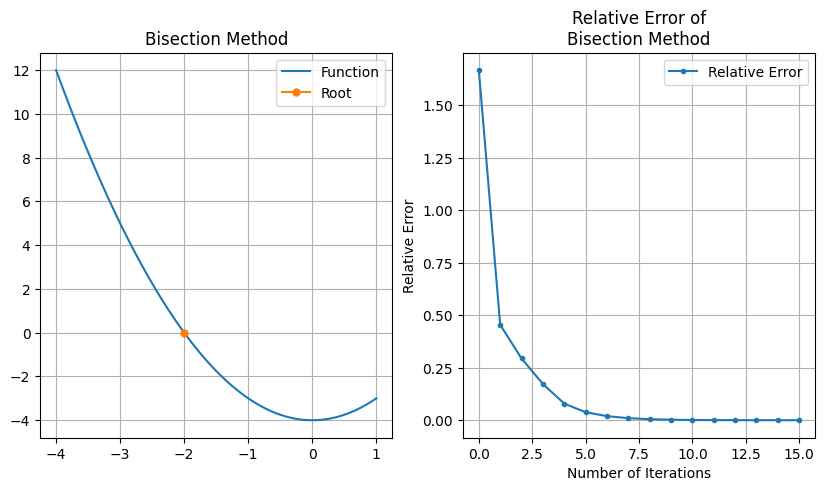

In [8]:
x = np.linspace(a,b,1000)
fx = function(x)
fig, ax = plt.subplots(figsize=(10,5), ncols=2)
ax[0].plot(x,fx, label='Function')
ax[0].plot(r,function(r), marker='.', markersize=10, label='Root')
ax[0].set_axisbelow(True)
ax[0].grid()
ax[0].legend()
ax[0].set_title('Bisection Method')

ax[1].plot(er, marker='.', label='Relative Error')
ax[1].set_axisbelow(True)
ax[1].grid()
ax[1].legend()
ax[1].set_title('Relative Error of\nBisection Method')
ax[1].set_xlabel('Number of Iterations')
ax[1].set_ylabel('Relative Error')

After 15 iterations, the root has been found around $-1.999954$ and the $f(r=-1.9999542) = -0.000183$, close to the zero from negative direction. From this case, we can conclude that the presence of root tends to one direction (positive or negative).

### Case 2

There is a function of $f(x) = x^2 + 4x + 4 = 0$. Find its root!.

In [10]:
def function2(x):
    return x**2 + 4*x + 4

By using the analytical method, the function of $f(x) = x^2 + 4x + 4 = (x + 2)^2$ has the double roots of $-2$ with the same sign. Let us try with the narrow initial guess boundaries, which are $a=-4$ and $b=1$. Hence, we expect the root lies in this range because the $-2$ in this interval.

In [12]:
a = -4
b = 1
r2, er = Bisection(function2,a,b)
print('The root is: %f' % r2)
print('f(r): %f' % function2(r2))
print('last iteration error: %f' % er)

There is no root in this range. Please input a pair of intial boundary guess.
The root is: nan
f(r): nan
last iteration error: 0.000000


Unfortunately, the root is not found by using the bisection method because the condition of $f(a).f(b) > 0$. Back to the condition, the $f(a)$ and $f(b)$ must have opposite signs, either $f(a) < 0$ and $f(b) > 0$ or $f(a) > 0$ and $f(b) < 0$.

Based on this function, we have

$f(a=-4) = -4^2+4.(-4)+4$ = 4

$f(b=1) = 1^2+4.(1)+4$ = 9

$f(a).f(b) = 4 . 9 = 36$

which is $36 > 0$, then the condition is not met. It is clear that this equation that has two root solutions with the same sign, can not be solved by using bisection method.